# Look at productivity in the Central Sills area of the CAA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime
import xarray as xr
import glob
import gsw

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar
import seaborn as sns

Observations

In [3]:
# Concentration of dMn in 2015
Manuel       = pd.read_csv('/ocean/brogalla/GEOTRACES/data/DMn_nmolL-1_BR-edited.csv')
M_station    = Manuel['Station'].astype('string')
M_depth      = Manuel['Depth'].astype('float')
M_dMn_nmolkg = Manuel['nmol kg-1'].astype('float')
M_dMn_nmolL  = Manuel['nmol L-1'].astype('float')
M_salinity   = Manuel['Salinity'].astype('float')

In [7]:
GEOTRACES   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names   = GEOTRACES['Station names'].dropna().astype('str')
Manuel_lons = GEOTRACES['station lon'].astype('float').dropna().values
Manuel_lats = GEOTRACES['Station lat'].astype('float').dropna().values

In [8]:
# POC and PON in 2015
P_data    = pd.read_csv('/ocean/brogalla/GEOTRACES/data/POC&PON_Data_GN02-GN03-edited.csv')
P_POC     = P_data['POC']
P_PON     = P_data['PON']
P_station = P_data['Station']
P_depth   = P_data['Depth']

In [9]:
# NO3 data in 2015
# N_data    = pd.read_csv('/ocean/brogalla/GEOTRACES/data/NO3_data_CAA.csv')
# NO3       = N_data['NTRA_01 [mmol/m**3]'] # mmol/m3
# N_station = N_data['Station']
# N_depth   = N_data['Depth [metres]']
NO3_leg2b = pd.read_csv('/ocean/brogalla/GEOTRACES/data/bio/NO3_data2.csv')
NO3_leg3a = pd.read_csv('/ocean/brogalla/GEOTRACES/data/bio/NO3_data3.csv')

lon_2b   = NO3_leg2b['Longitude [degrees_east]'].astype('float').values
lat_2b   = NO3_leg2b['Latitude [degrees_north]'].astype('float').values
depth_2b = NO3_leg2b['Depth [metres]'].astype('float').values
NO3_2b   = NO3_leg2b['NTRA_01 [mmol/m**3]'].astype('float').values

lon_3a   = NO3_leg3a['Longitude [degrees_east]'].astype('float').values
lat_3a   = NO3_leg3a['Latitude [degrees_north]'].astype('float').values
depth_3a = NO3_leg3a['Depth [metres]'].astype('float').values
NO3_3a   = NO3_leg3a['NTRA_01 [mmol/m^3]'].astype('float').values

NO3       = np.array([])
N_station = np.array([]) 
N_depth   = np.array([])
for stn in range(5, 12):
    # find indices associated with each station
    min_val  = np.amin(np.abs(lon_2b - Manuel_lons[stn]))
    min_vals = [i for i, x in enumerate(np.abs(lon_2b - Manuel_lons[stn])) if x == min_val]
    
    if stn==5:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA1']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
    elif stn==6:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA2']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
    elif stn==7:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA3']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
    elif stn==8:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA4']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
    elif stn==9:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA5']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
    elif stn==10:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA6']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
    elif stn==11:
        NO3 = np.append(NO3, NO3_2b[min_vals])
        N_station = np.append(N_station, ['CAA7']*len(depth_2b[min_vals]))
        N_depth   = np.append(N_depth, depth_2b[min_vals])
        
for stn in range(12, 18):
    # find indices associated with each station
    min_val  = np.amin(np.abs(lon_3a - Manuel_lons[stn]))
    min_vals = [i for i, x in enumerate(np.abs(lon_3a - Manuel_lons[stn])) if x == min_val]
    
    if stn==12:
        NO3 = np.append(NO3, NO3_3a[min_vals])
        N_station = np.append(N_station, ['CAA8']*len(depth_3a[min_vals]))
        N_depth   = np.append(N_depth, depth_3a[min_vals])
    elif stn==13:
        NO3 = np.append(NO3, NO3_3a[min_vals])
        N_station = np.append(N_station, ['CAA9']*len(depth_3a[min_vals]))
        N_depth   = np.append(N_depth, depth_3a[min_vals])

In [10]:
# Oxygen in 2015
O2_data    = pd.read_csv('/ocean/brogalla/GEOTRACES/data/combined_GEOTRACES2015.csv')
O2         = O2_data['Oxygen, SBE 43 [ml/l]']
O2_station = O2_data['Station']
O2_depth   = O2_data['Depth [salt water, m], lat = 49.00']

In [11]:
# Iron in 2015
Fe_data    = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Fe_Integrated_Data_UBC-UVic_4-17-19-edited.csv')
Fe_station = Fe_data['Station']
Fe_depth   = Fe_data['Depth']
Fe         = Fe_data['AVG']

Model:

In [12]:
month=8
folder = f'/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2015_euphotic/'
model_2015   = nc.Dataset(f'{folder}ANHA12_EXH006_2015_monthly.nc')
lon_model    = np.array(model_2015.variables['nav_lon'])
lat_model    = np.array(model_2015.variables['nav_lat'])
model_depth  = np.array(model_2015.variables['deptht'])
model_dmn    = np.array(model_2015.variables['dissolmn'])[month,0,:,:,:]

Parameters:

In [13]:
stn_list = ['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9'] # stations I want to look at
var_list = ['POC', 'NO3', 'dMn', 'dFe', 'O2'] # Variables I want to look at: POC, PON, dMn, dFe, oxygen
color_list = ['#146870', '#3dc9b3', '#327591', '#daa520', '#a34054']

In [14]:
# xlims = [(0,25), (0, 2), (0, 8), (0, 4), (6, 10)]
xlims = [(0,20), (0,15), (0, 8), (0, 4), (6, 10)]

##### Define functions

In [15]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = int(i)
        transect_j = int(j)
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, int(i))
            transect_j = np.append(transect_j, int(j))
    
    return transect_i, transect_j

In [16]:
def read_data(var, name):
    model_var = []
    
    if var=='POC':
        obs_depth = P_depth[P_station==name].values
        obs_var   = P_POC[P_station==name].values    
    elif var=='PON':
        obs_depth = P_depth[P_station==name].values
        obs_var   = P_PON[P_station==name].values    
    elif var=='NO3':
        obs_depth = N_depth[N_station==name]
        obs_var   = NO3[N_station==name]   
    elif var=='O2':
        obs_depth = O2_depth[O2_station==name].values
        obs_var   = O2[O2_station==name].values        
    elif var=='dMn':
        obs_depth = M_depth[M_station==name].values
        obs_var   = M_dMn_nmolL[M_station==name].values
        
        i,j = find_index_ANHA12_sub(Manuel_lons[stn_names==name], Manuel_lats[stn_names==name])
        model_var = model_dmn[:,int(i),int(j)]
    elif var=='dFe':
        obs_depth = Fe_depth[Fe_station==name].values
        obs_var   = Fe[Fe_station==name].values        
    
    return obs_depth, obs_var, model_var

In [17]:
def plot_profile(name, ax, var, xlim=(100,0), color='r'): 
        
    # Var is variable name
    obs_depth, obs_var, model_var = read_data(var, name)
    ax.plot(obs_var, obs_depth, c=color, markersize=18, marker='.', markeredgecolor='k')
    
    ax.invert_yaxis()
    try:
#         ax.set_ylim(np.amax(obs_depth)+20,0)
        obs_bottom = obs_var[np.argmin(np.abs(obs_depth-150))]
        ax.plot([obs_bottom, obs_bottom],[150,0],'--k')
        ax.set_ylim(150,0)
        ax.set_xlim(xlim[0], xlim[1])
    except:
        print('empty obs depth array')
        
    try:
        ax.plot(model_var*1e9, model_depth, '--', c=color, linewidth=3.0) 
    except:
        a = 1 # do nothing
        
    if name==stn_list[0]:
        ax.set_ylabel(var, fontsize=20)
    if var==var_list[0]:
        ax.set_title(name, fontsize=20)
        
    return

Plot:

In [ ]:
fig, ax = plt.subplots(5,9, figsize=(24,15))

for v, var in enumerate(var_list):
    for stn, name in enumerate(stn_list):
        plot_profile(name, ax[v,stn], var, color=color_list[v], xlim=xlims[v])

empty obs depth array
empty obs depth array


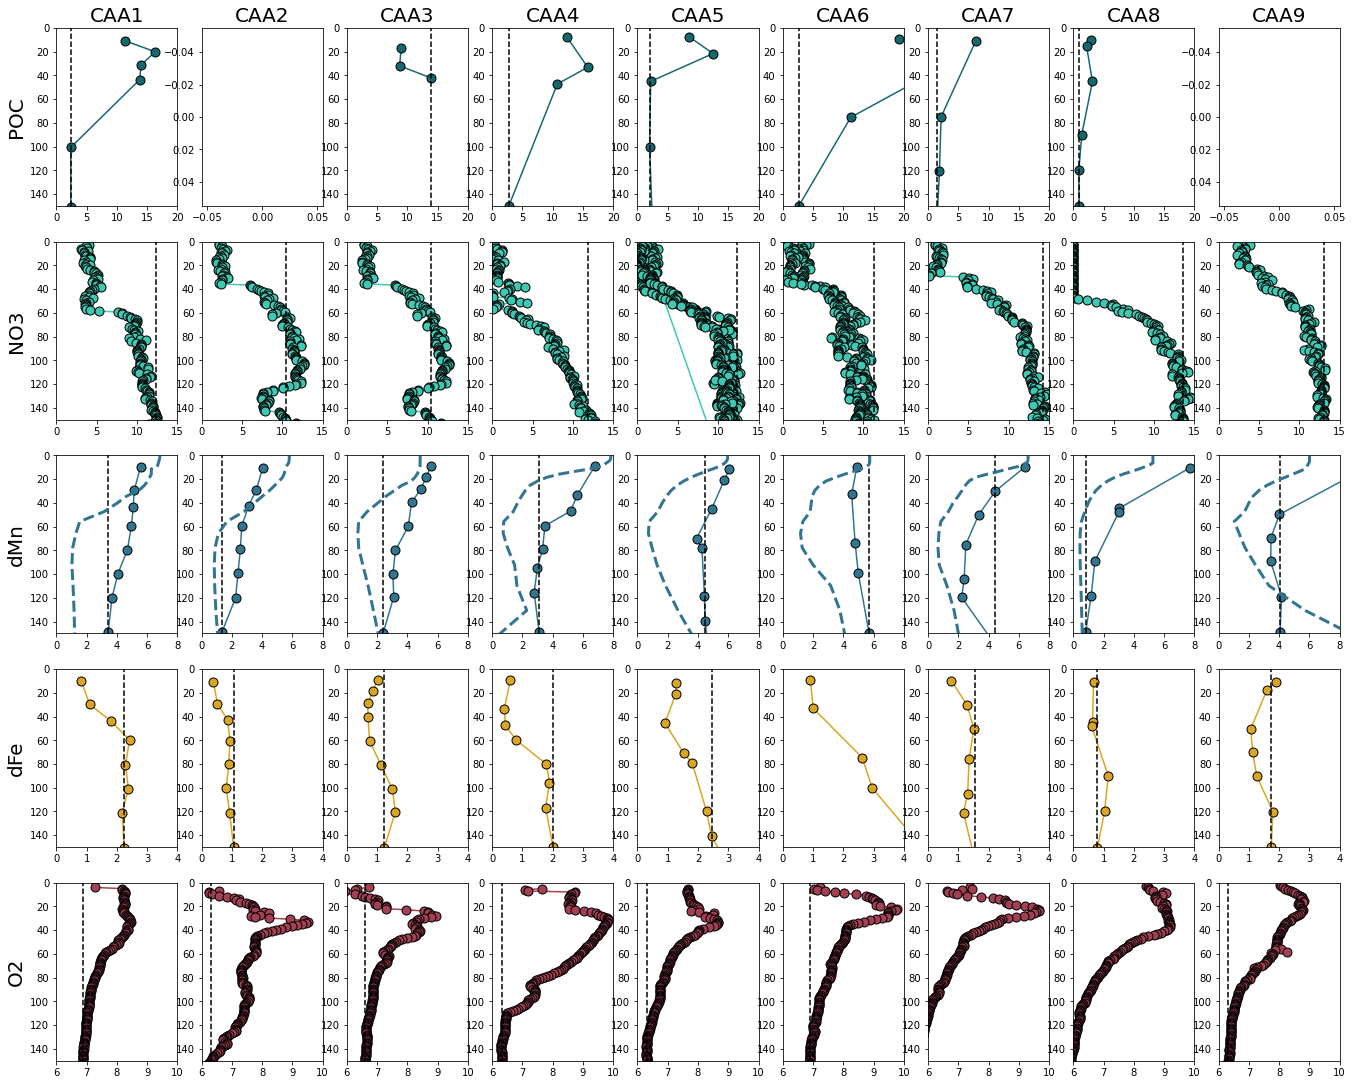

In [19]:
fig, ax = plt.subplots(5,9,figsize=(23,19))
for v, var in enumerate(var_list):
    for n, stn in enumerate(stn_list):
        plot_profile(stn, ax[v,n], var, xlim=(xlims[v][0], xlims[v][1]), color=color_list[v])
    
# ax[v,0].set_ylabel('Depth [m]')

Thoughts from this plot:
- POC largest at CAA1, CAA4, CAA5, CAA6, CAA7. Ranges from 40-80 m depth, maximum typically around 20 or 30 m depth.
- Based on Fe depletion, stations CAA1, CAA4, CAA5, and CAA6 should have the strongest primary production. Depths of depletion range from 40-140 m.
- dMn most underestimated in subsurface around CAA4, CAA5, CAA6, CAA7
- Oxygen maximum occurs around 40 m in West and shallows to 20 m nearby central sills area, minimum around 100-150 m. That could suggest remineralization is occurring between 20-100 m depth, which would be consistent with the depth range where I would expect it.

In [68]:
# Calculate bottom of euphotic zone based on NO3 profiles:
euphotic_depth = [60, 40, 40, 85, 75, 40, 40, 60, 50]
total_uptake   = np.zeros(len(euphotic_depth))
for s, stn in enumerate(stn_list):
    
    NO3_ref      = NO3[N_station==stn][np.argmin(np.abs(N_depth[N_station==stn]-euphotic_depth[s]))]
    
    for d, depth in enumerate(N_depth[N_station==stn]):
        
        if (depth < euphotic_depth[s]):
            local_uptake     = NO3[N_station==stn][d] - NO3_ref
            total_uptake[s] += local_uptake

In [74]:
print(f'Nitrate uptake in mmol/m3: {-total_uptake/euphotic_depth}')

Nitrate uptake in mmol/m3: [ 3.8183      3.8485      3.8485      5.40892941 22.91844     7.98745
  3.60865     5.74403333  4.1361    ]



Extended Redfield ratio (Morel et al., 2013): 

$$ (C_{106} N_{16} P_{1})_{1000} Fe_{8} Mn_{4} Zn_{0.8} Cu_{0.4} Co_{0.2} Cd_{0.2}$$ 

In [84]:
uptake_NO3_molL = (-total_uptake/euphotic_depth)*1e-3*1e-3 # mmol/m3 --> mmol/L --> mol/L

R_MnNO3   = 4/16000 # Redfield ratio NO3:Mn
uptake_Mn = uptake_NO3_molL*R_MnNO3

print(f'Uptake of Mn (nmol/L) in euphotic zone at each station:')
for s, stn in enumerate(stn_list):
    print(f'Station {stn}: {uptake_Mn[s]*1e9:.2f}')

Uptake of Mn (nmol/L) in euphotic zone at each station:
Station CAA1: 0.95
Station CAA2: 0.96
Station CAA3: 0.96
Station CAA4: 1.35
Station CAA5: 5.73
Station CAA6: 2.00
Station CAA7: 0.90
Station CAA8: 1.44
Station CAA9: 1.03
